In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

import random
# fixing random seed for reproducibility
random.seed(200216758)
np.random.seed(200216758)

### Load the MRI+MMSE dataset

In [3]:
mri_data_df = pd.read_csv("/Users/shrutidudwadkar/Documents/Dissertation/Final_Data+Code/MRI/Processed/mri_mmse.csv") 
mri_data_df.drop(columns=['RID'], inplace=True)
mri_data_df.head(15)

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST99SA,ST99TA,ST99TS,ST9SV,MMSCORE_sc,MMSCORE_m06,MMSCORE_m12,MMSCORE_m24,MMSCORE_m36,label
0,1578,2862,1312,2.065,0.609,2305,763,2.650,0.795,2934,...,3387,2.911,0.660,1623,29,29,30,29,30,CN
1,1102,3339,1386,2.297,0.702,1621,631,2.166,0.760,2517,...,3046,2.850,0.714,1296,29,29,28,30,29,CN
2,1226,2719,1477,1.781,0.538,1813,622,2.409,0.778,3397,...,2832,2.735,0.617,1998,28,29,30,28,26,CN
3,744,3456,1748,1.960,0.620,1792,623,2.496,0.776,3106,...,2692,3.025,0.596,1493,30,29,30,29,30,CN
4,908,2741,1216,2.228,0.612,2095,753,2.518,0.884,3696,...,3375,2.736,0.697,1997,26,28,28,29,28,CN
5,1487,2814,1437,1.925,0.592,1903,622,2.397,1.023,3919,...,3152,2.742,0.717,2053,29,27,28,25,25,MCI
6,1310,3591,1484,2.238,0.699,2257,769,2.470,0.683,3268,...,2966,2.950,0.653,1474,29,30,29,29,30,CN
7,1628,3152,1437,2.046,0.693,1904,701,2.348,0.709,2647,...,3424,2.737,0.779,3932,30,28,30,29,30,CN
8,1473,3424,1538,2.135,0.580,1545,609,2.242,0.649,2570,...,2794,3.063,0.704,2651,29,28,27,28,27,CN
9,1441,4008,1941,2.057,0.558,1895,779,2.102,0.687,4228,...,3488,2.764,0.626,2135,27,28,28,28,26,MCI


In [3]:
mri_features = mri_data_df.columns.values.tolist()
print("There are total ", len(mri_features)-1, " features in MRI and MMSE data. \n")

There are total  332  features. 



### Distribution of subjects across 3 labels

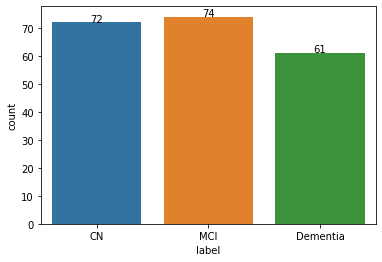

In [4]:
graph = sns.countplot(x="label", data=mri_data_df);
for p in graph.patches: 
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.2, height, ha="center")


In [5]:
encoder = preprocessing.LabelEncoder()
mri_data_df['label']= encoder.fit_transform(mri_data_df['label'])
mri_data_df['label'].unique()
mri_data_df.head()

,ST101SV,ST102CV,ST102SA,ST102TA,ST102TS,ST103CV,ST103SA,ST103TA,ST103TS,ST104CV,...,ST99SA,ST99TA,ST99TS,ST9SV,MMSCORE_sc,MMSCORE_m06,MMSCORE_m12,MMSCORE_m24,MMSCORE_m36,label
0,1578,2862,1312,2.065,0.609,2305,763,2.650,0.795,2934,...,3387,2.911,0.660,1623,29,29,30,29,30,0
1,1102,3339,1386,2.297,0.702,1621,631,2.166,0.760,2517,...,3046,2.850,0.714,1296,29,29,28,30,29,0
2,1226,2719,1477,1.781,0.538,1813,622,2.409,0.778,3397,...,2832,2.735,0.617,1998,28,29,30,28,26,0
3,744,3456,1748,1.960,0.620,1792,623,2.496,0.776,3106,...,2692,3.025,0.596,1493,30,29,30,29,30,0
4,908,2741,1216,2.228,0.612,2095,753,2.518,0.884,3696,...,3375,2.736,0.697,1997,26,28,28,29,28,0


In [6]:
X_mri, y_mri = np.split(mri_data_df.to_numpy(), [-1], axis=1) 

### Split the dataset into train and test data using 85:15 split

In [7]:
X_train_mri, X_test_mri, y_train_mri, y_test_mri = train_test_split(X_mri, y_mri, test_size=0.15, random_state=44)


### Scaling

In [8]:
sc = StandardScaler()
X_train_mri = sc.fit_transform(X_train_mri)
X_test_mri = sc.transform(X_test_mri)


### SGDClassifier using l1 penalty

In [9]:
classifier_mri = SGDClassifier(penalty='l1', alpha=0.03, max_iter=10e7, loss='log')
classifier_mri.fit(X_train_mri, y_train_mri)
y_pred = classifier_mri.predict(X_test_mri)

print("Classification report: ")
print(classification_report(y_test_mri , y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        10
         1.0       0.40      0.67      0.50         6
         2.0       0.83      0.62      0.71        16

    accuracy                           0.72        32
   macro avg       0.71      0.73      0.70        32
weighted avg       0.77      0.72      0.73        32



/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [10]:
train_score = classifier_mri.score(X_train_mri, y_train_mri)
test_score = classifier_mri.score(X_test_mri, y_test_mri)
coeff_used = np.sum(classifier_mri.coef_ != 0)

print("training score: ", train_score)
print("test score: ", test_score)
feat_l1 = list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[0]]) + list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[1]]) + list(mri_data_df.columns[:-1][(classifier_mri.coef_!=0)[2]])
feat_l1 = list(dict.fromkeys(feat_l1))
print("number of features used: ", len(feat_l1))

training score:  0.9142857142857143
test score:  0.71875
number of features used:  105


In [11]:
auc = roc_auc_score(y_test_mri, classifier_mri.predict_proba(X_test_mri), multi_class='ovr')
print("AUC: ", auc)

AUC:  0.8120799339549339


In [12]:
rmse = sqrt(mean_squared_error(y_test_mri, y_pred))
print("RMSE: ", rmse)

RMSE:  0.6123724356957945


### SGDClassifier using l2 penalty

In [13]:
classifier_mri_l2 = SGDClassifier(penalty='l2', alpha=0.26, max_iter=10e6, loss='log')

classifier_mri_l2.fit(X_train_mri, y_train_mri)
y_pred = classifier_mri_l2.predict(X_test_mri)

print("Classification report: ")
print(classification_report(y_test_mri , y_pred))

Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.56      0.83      0.67         6
         2.0       0.77      0.62      0.69        16

    accuracy                           0.69        32
   macro avg       0.67      0.72      0.69        32
weighted avg       0.71      0.69      0.69        32



/Users/shrutidudwadkar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
train_score = classifier_mri_l2.score(X_train_mri, y_train_mri)
test_score = classifier_mri_l2.score(X_test_mri, y_test_mri)
coeff_used = np.sum(classifier_mri_l2.coef_ != 0)

print("training score: ", train_score)
print("test score: ", test_score)

feat_l2 = list(mri_data_df.columns[:-1][(classifier_mri_l2.coef_!=0)[0]]) + list(mri_data_df.columns[:-1][(classifier_mri_l2.coef_!=0)[1]]) + list(mri_data_df.columns[:-1][(classifier_mri_l2.coef_!=0)[2]])
feat_l2 = list(dict.fromkeys(feat_l2))
print("number of features used: ", len(feat_l2))

training score:  0.96
test score:  0.6875
number of features used:  332


In [15]:
rmse = sqrt(mean_squared_error(y_test_mri, y_pred))
print("RMSE: ", rmse)

RMSE:  0.8838834764831844


## Model Results
### Lasso and Ridge penalty results on MRI + MMSE dataset

| Model | Precision  | Recall  | F1-Score  | Accuracy 
|:-:|:-:|:-:|:-:|:-:|
| **SGD with l1 penalty**  | **0.71** | **0.73**  | **0.70**  | **0.72**  |
| SGD with l2 penalty  | 0.67 | 0.72 | 0.69 | 0.69 |
